In [3]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv('C:/Users/VIMAL P/Downloads/spam.csv',encoding='ISO-8859-1')

In [8]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.size

27860

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [13]:
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df=df.rename(columns={'v1':'Target','v2':'Message'})

In [15]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df.drop_duplicates(keep='first',inplace=True)

In [18]:
df.duplicated().sum()


0

In [19]:
df.size

10338

In [20]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [21]:
df['Target']=LE.fit_transform(df['Target'])

In [22]:
df['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [23]:
df.head(10)

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [24]:
import matplotlib.pyplot as plt

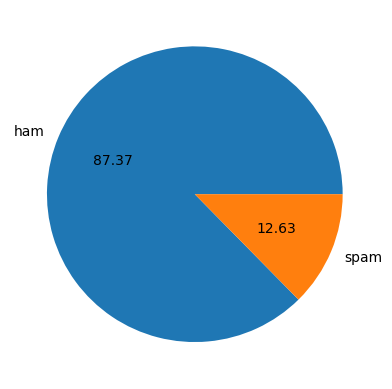

In [25]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [26]:
a=df['Message']

In [27]:
a

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [28]:
b=df['Target']

In [29]:
b

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=42)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [33]:
CV=CountVectorizer()

In [34]:
x_train_cv=CV.fit_transform(x_train)
x_test_cv=CV.transform(x_test)

In [35]:
print(x_train_cv)

  (0, 6765)	1
  (0, 7353)	1
  (0, 4593)	1
  (0, 2667)	1
  (0, 3660)	1
  (1, 7369)	1
  (1, 736)	1
  (1, 6758)	1
  (1, 4877)	1
  (1, 6731)	1
  (2, 6731)	1
  (2, 7233)	1
  (2, 4127)	1
  (2, 4851)	1
  (2, 4692)	1
  (2, 6807)	1
  (3, 2952)	1
  (3, 7172)	1
  (3, 1603)	1
  (3, 5126)	1
  (3, 7444)	1
  (3, 3266)	1
  (3, 5344)	1
  (3, 4066)	1
  (3, 5626)	1
  :	:
  (4133, 2515)	1
  (4133, 5145)	1
  (4133, 6081)	1
  (4134, 7444)	1
  (4134, 1582)	1
  (4134, 3319)	1
  (4134, 2829)	1
  (4134, 4950)	1
  (4134, 6184)	1
  (4134, 7098)	1
  (4134, 6743)	1
  (4134, 4266)	1
  (4134, 3702)	1
  (4134, 4871)	1
  (4134, 7391)	3
  (4134, 1949)	1
  (4134, 4138)	1
  (4134, 6265)	1
  (4134, 5892)	1
  (4134, 802)	1
  (4134, 5688)	1
  (4134, 6754)	1
  (4134, 216)	1
  (4134, 6395)	1
  (4134, 45)	1


In [36]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [37]:
LR.fit(x_train_cv,y_train)
y_pred=LR.predict(x_train_cv)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_train,y_pred)*100

99.75816203143893

In [40]:
y_pred_test=LR.predict(x_test_cv)

In [41]:
accuracy_score(y_test,y_pred_test)*100

97.87234042553192